In [ ]:
# Pyspark DE Project "Real time End to End PySpark Project" by "Learn by doing it YT Channel"
#import libraries
!pip install kaggle
import kaggle
#download dataset using kaggle api --downloading anyone playstore dataset using old api
!kaggle datasets download arnikaer/googleplaystore -f googleplaystore.csv

Dataset URL: https://www.kaggle.com/datasets/arnikaer/googleplaystore
License(s): unknown
googleplaystore.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#extract file from zip file
import zipfile
zip_ref=zipfile.ZipFile('googleplaystore.csv.zip')
zip_ref.extractall() #extract file to dir
zip_ref.close() #close file

In [3]:
# install and import pyspark 
#!pip install pyspark it is already installed

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType,StructField,StringType,IntegerType
from pyspark.sql.functions import *


In [4]:
# Initialize SparkSession  generally in databricks it is not required  "\" we are using as line continuation
"""spark = SparkSession.builder.appName("GooglePlaystoreApp")\ # Assigns a name to your Spark job
    .master("local[*]") \             # Runs locally using all available CPU cores
    .config("spark.executor.memory", "2g") \  # Allocates 2 GB memory for each executor
    .getOrCreate()                    # Retrieves or creates a new Spark session
"""
spark = SparkSession.builder \
    .appName("GooglePlaystoreApp") \
    .getOrCreate()
#Create Dataframe
df=spark.read.load('googleplaystore.csv',format='csv',sep=',',header='true',escape='"',inferschema='true')

<>:2: SyntaxWarning: invalid escape sequence '\ '
<>:2: SyntaxWarning: invalid escape sequence '\ '
C:\Users\khila\AppData\Local\Temp\ipykernel_18076\2106374959.py:2: SyntaxWarning: invalid escape sequence '\ '
  """spark = SparkSession.builder.appName("GooglePlaystoreApp")\ # Assigns a name to your Spark job


In [5]:
df.count()

10841

In [6]:
df.show(5)

+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------+------------------+------------+
|                 App|      Category|Rating|Reviews|Size|   Installs|Type|Price|Content Rating|              Genres|Last Updated|       Current Ver| Android Ver|
+--------------------+--------------+------+-------+----+-----------+----+-----+--------------+--------------------+------------+------------------+------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159| 19M|    10,000+|Free|    0|      Everyone|        Art & Design|    7-Jan-18|             1.0.0|4.0.3 and up|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967| 14M|   500,000+|Free|    0|      Everyone|Art & Design;Pret...|   15-Jan-18|             2.0.0|4.0.3 and up|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510|8.7M| 5,000,000+|Free|    0|      Everyone|        Art & Design|    1-Aug-18|             1.2.4|4.0.3 and up|
|Sketch - Draw & P...|ART_AN

In [7]:
df.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Reviews: string (nullable = true)
 |-- Size: string (nullable = true)
 |-- Installs: string (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Content Rating: string (nullable = true)
 |-- Genres: string (nullable = true)
 |-- Last Updated: string (nullable = true)
 |-- Current Ver: string (nullable = true)
 |-- Android Ver: string (nullable = true)



In [8]:
#Data cleaning steps
df=df.drop("size","Content Rating","Last Updated","Android Ver","Current Ver")

In [13]:
df.show(2)

+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|                 App|      Category|Rating|Reviews|Installs|Type|Price|              Genres|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|   10000|Free|    0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|  500000|Free|    0|Art & Design;Pret...|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
only showing top 2 rows



In [12]:
df.printSchema()

root
 |-- App: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- Rating: double (nullable = true)
 |-- Reviews: integer (nullable = true)
 |-- Installs: integer (nullable = true)
 |-- Type: string (nullable = true)
 |-- Price: integer (nullable = true)
 |-- Genres: string (nullable = true)



In [11]:
df=df.withColumn("Reviews",col("Reviews").cast(IntegerType()))\
.withColumn("Installs",regexp_replace(col("Installs"),"[^0-9]",""))\
.withColumn("Installs",col("Installs").cast(IntegerType()))\
.withColumn("Price",regexp_replace(col("Price"),"[$]",""))\
.withColumn("Price",col("Price").cast(IntegerType()))


In [15]:
df.show(5)

+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|                 App|      Category|Rating|Reviews|Installs|Type|Price|              Genres|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|   10000|Free|    0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|  500000|Free|    0|Art & Design;Pret...|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510| 5000000|Free|    0|        Art & Design|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5| 215644|50000000|Free|    0|        Art & Design|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3|    967|  100000|Free|    0|Art & Design;Crea...|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
only showing top 5 rows



In [17]:
df.createOrReplaceTempView("apps")

In [ ]:
(spark.sql("select * from apps")).show(5) #%sql before select statement we can use in databrics as magic tool because that table already registered in Hive mentastore or as delta tables

+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|                 App|      Category|Rating|Reviews|Installs|Type|Price|              Genres|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
|Photo Editor & Ca...|ART_AND_DESIGN|   4.1|    159|   10000|Free|    0|        Art & Design|
| Coloring book moana|ART_AND_DESIGN|   3.9|    967|  500000|Free|    0|Art & Design;Pret...|
|U Launcher Lite –...|ART_AND_DESIGN|   4.7|  87510| 5000000|Free|    0|        Art & Design|
|Sketch - Draw & P...|ART_AND_DESIGN|   4.5| 215644|50000000|Free|    0|        Art & Design|
|Pixel Draw - Numb...|ART_AND_DESIGN|   4.3|    967|  100000|Free|    0|Art & Design;Crea...|
+--------------------+--------------+------+-------+--------+----+-----+--------------------+
only showing top 5 rows



In [ ]:
#1. Top Reviews Given to apps
result=spark.sql("select app,sum(Reviews) Total_Reviews from apps group by App order by Total_Reviews desc") #group by 1 and order by 2 supported by Databrics but not by pyspark
result.show()

+--------------------+-------------+
|                 app|Total_Reviews|
+--------------------+-------------+
|           Instagram|    266241989|
|  WhatsApp Messenger|    207348304|
|      Clash of Clans|    179558781|
|Messenger – Text ...|    169932272|
|      Subway Surfers|    166331958|
|    Candy Crush Saga|    156993136|
|            Facebook|    156286514|
|         8 Ball Pool|     99386198|
|        Clash Royale|     92530298|
|            Snapchat|     68045010|
|     Viber Messenger|     56675481|
|UC Browser - Fast...|     53140694|
|             YouTube|     51278853|
|        Temple Run 2|     48710930|
|Sniper 3D Gun Sho...|     46022233|
|      My Talking Tom|     44668928|
|Duolingo: Learn L...|     44047832|
|       Google Photos|     43423827|
|Clean Master- Spa...|     42916526|
|                 Pou|     41939801|
+--------------------+-------------+
only showing top 20 rows



In [49]:
#2. Top 5 installed apps
spark.sql("select app, sum(installs) Total_Installs from apps group by app order by Total_Installs desc").show(5)

+--------------+--------------+
|           app|Total_Installs|
+--------------+--------------+
|Subway Surfers|    6000000000|
|      Hangouts|    4000000000|
|     Instagram|    4000000000|
|  Google Drive|    4000000000|
|   Google News|    4000000000|
+--------------+--------------+
only showing top 5 rows



In [48]:
#3. Top 5 installed apps based on free and paid
spark.sql("select app, type, sum(installs) Total_Installs from apps group by app, type order by Total_Installs desc").show(5)

+--------------+----+--------------+
|           app|type|Total_Installs|
+--------------+----+--------------+
|Subway Surfers|Free|    6000000000|
|  Google Drive|Free|    4000000000|
|     Instagram|Free|    4000000000|
|      Hangouts|Free|    4000000000|
| Google Photos|Free|    4000000000|
+--------------+----+--------------+
only showing top 5 rows



In [46]:
#4. Top 5 installed apps based on category
spark.sql("select category, sum(installs) Total_Installs from apps group by category order by Total_Installs desc").show(5)

+-------------+--------------+
|     category|Total_Installs|
+-------------+--------------+
|         GAME|   35086024415|
|COMMUNICATION|   32647276251|
| PRODUCTIVITY|   14176091369|
|       SOCIAL|   14069867902|
|        TOOLS|   11452771915|
+-------------+--------------+
only showing top 5 rows



In [51]:
#5. Top 5 paid apps
spark.sql("select app, sum(price) Total_Price from apps where type='Paid' group by app order by Total_Price desc").show(5)

+--------------------+-----------+
|                 app|Total_Price|
+--------------------+-----------+
|I'm Rich - Trump ...|        400|
|most expensive ap...|        399|
|         💎 I'm rich|        399|
|       I Am Rich Pro|        399|
|I'm Rich/Eu sou R...|        399|
+--------------------+-----------+
only showing top 5 rows



In [ ]:
# As of now in Pyspark there is no inbuild visualization libraries but we can convert pyspark df to pandas df and we can use libraries like Matplotlib, Seaborn, or Pandas.
pandas_df=df.toPandas()
pandas_df

,App,Category,Rating,Reviews,Installs,Type,Price,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Art & Design;Creativity
...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,5000.0,Free,0.0,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,100.0,Free,0.0,Education
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,1000.0,Free,0.0,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,1000.0,Free,0.0,Books & Reference


   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.8 MB 11.2 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/7.8 MB 8.7 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 7.7 MB/s eta 0:00:01
   -------------------------- ------------- 5.2/7.8 MB 6.6 MB/s eta 0:00:01
   ----------------------------- ---------- 5.8/7.8 MB 5.5 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 4.9 MB/s eta 0:00:01
   ---------------------------------- ----- 6.8/7.8 MB 4.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 4.2 MB/s eta 0:00:01
   ---------------------------- ----------- 1.6/2.2 MB 3.8 MB/s eta 0:00:01
   ----------------------

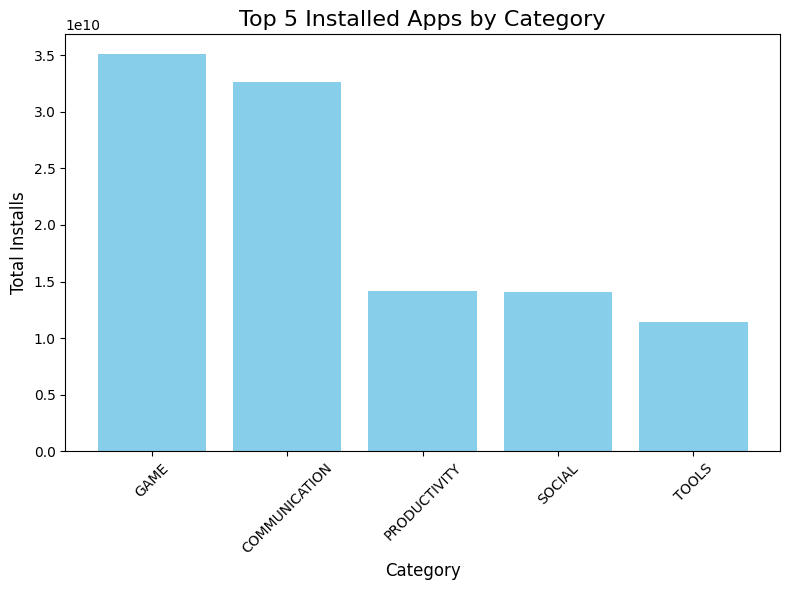

In [56]:
# We are going to us matplotlib for visualization
%pip install matplotlib
import matplotlib.pyplot as plt
import pandas as pd
top_categories=(
    pandas_df.groupby("Category")["Installs"]
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .reset_index()
)

#Plot chart
plt.figure(figsize=(8,6))
plt.bar(top_categories["Category"],top_categories["Installs"],color="skyblue")
plt.title("Top 5 Installed Apps by Category", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Installs", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Note: you may need to restart the kernel to use updated packages.


C:\Users\khila\AppData\Local\Temp\ipykernel_18076\680321504.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x="Category", y="Installs", data=top_categories, palette="coolwarm")
C:\Users\khila\AppData\Local\Temp\ipykernel_18076\680321504.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
C:\Users\khila\AppData\Local\Temp\ipykernel_18076\680321504.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot.figure.show()


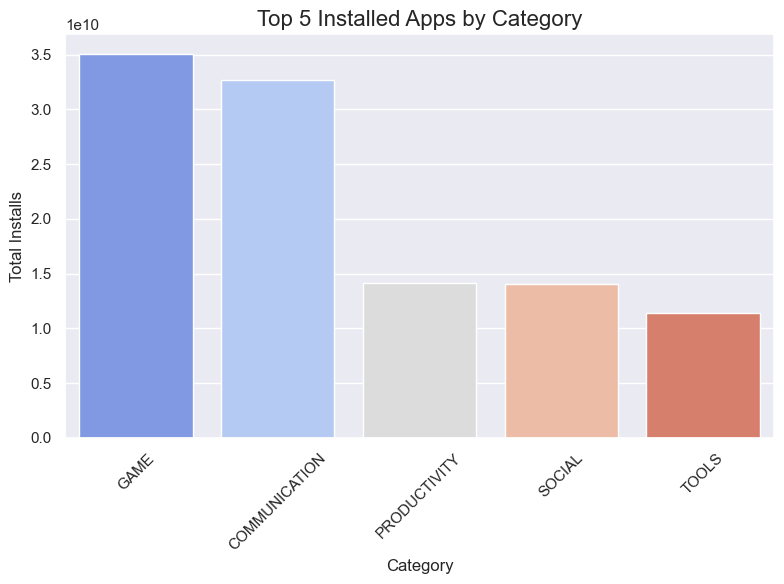

In [58]:
%pip install seaborn
import seaborn as sns

# Assuming top_categories DataFrame is already created

# Create the bar plot using Seaborn
sns.set(rc={"figure.figsize": (8, 6)})  # Set the figure size
plot = sns.barplot(x="Category", y="Installs", data=top_categories, palette="coolwarm")

# Add title and labels
plot.set_title("Top 5 Installed Apps by Category", fontsize=16)
plot.set_xlabel("Category", fontsize=12)
plot.set_ylabel("Total Installs", fontsize=12)

# Rotate the x-axis labels for better readability
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)

# Display the plot
plot.figure.tight_layout()
plot.figure.show()
